Both the datasets have been randomized and one random table has been stored and dealt with. The top 230 rows in a random table gives us a random training set, and the other 80 as testing set which serves our purpose.

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
data=pd.read_csv("D:/IDA/Biomechanical_Data_2Classes.csv")

In [3]:
n_train = 230

# shuffle the indexes
shuffled_indexes = np.arange(len(data))
np.random.shuffle(shuffled_indexes)

# use 'n_train' samples for training and the rest for testing
train_ids = shuffled_indexes[:n_train]
test_ids = shuffled_indexes[n_train:]

#data["class"]=data["class"].astype("category")

train_data = data.iloc[train_ids]
test_data = data.iloc[test_ids] 

#training data
train_label=train_data["class"]
train_data=train_data.drop(columns=["class"])

# # Testing data
test_label=test_data["class"]
test_data=test_data.drop(columns=["class"])

In [4]:
clfs = []
l = [5,15,25,40,50]
for m in l:
    k = tree.DecisionTreeClassifier(min_samples_leaf=m)
    k.fit(train_data,train_label)
    clfs.append(k)

minimum samples leaf=5


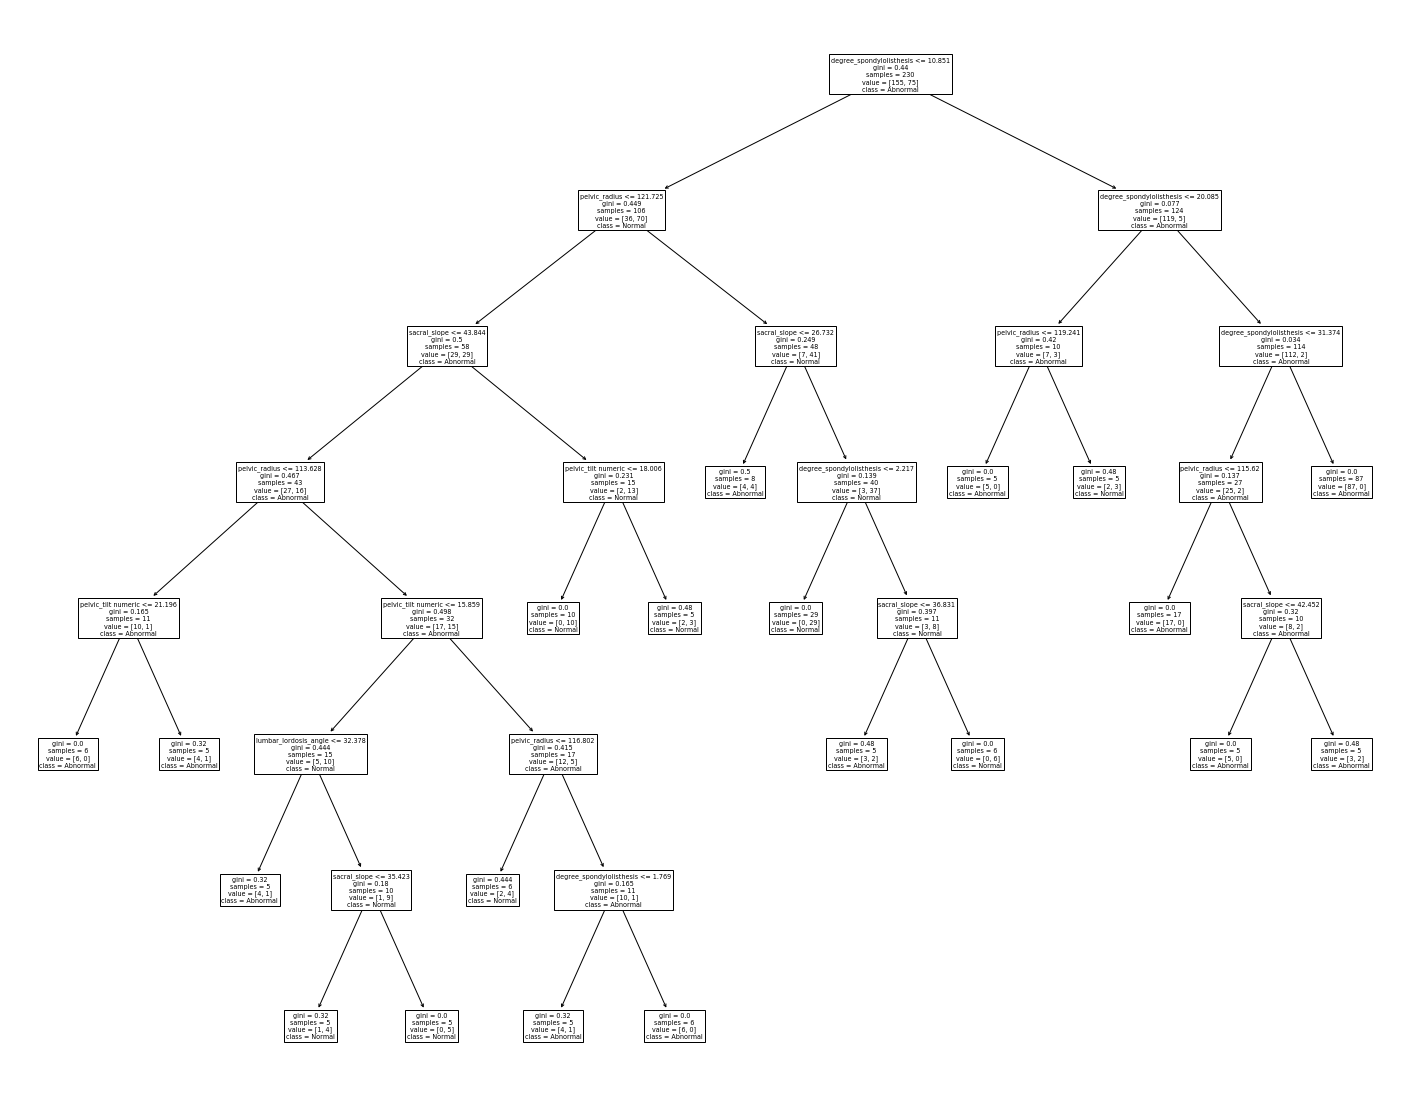

minimum samples leaf=15


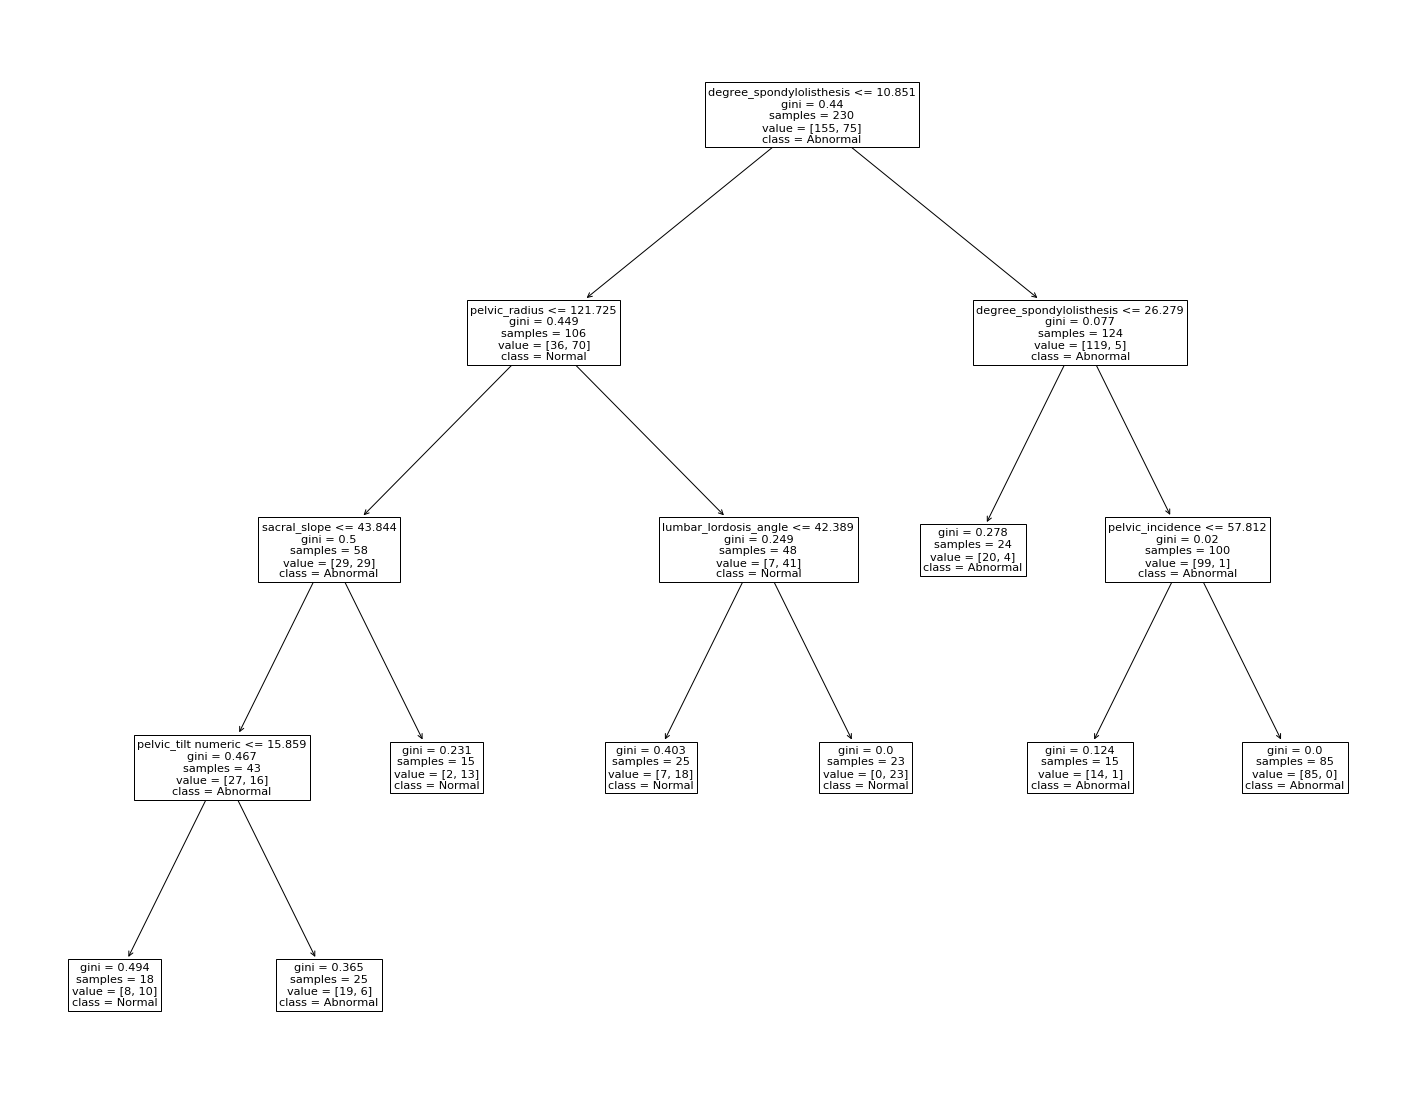

minimum samples leaf=25


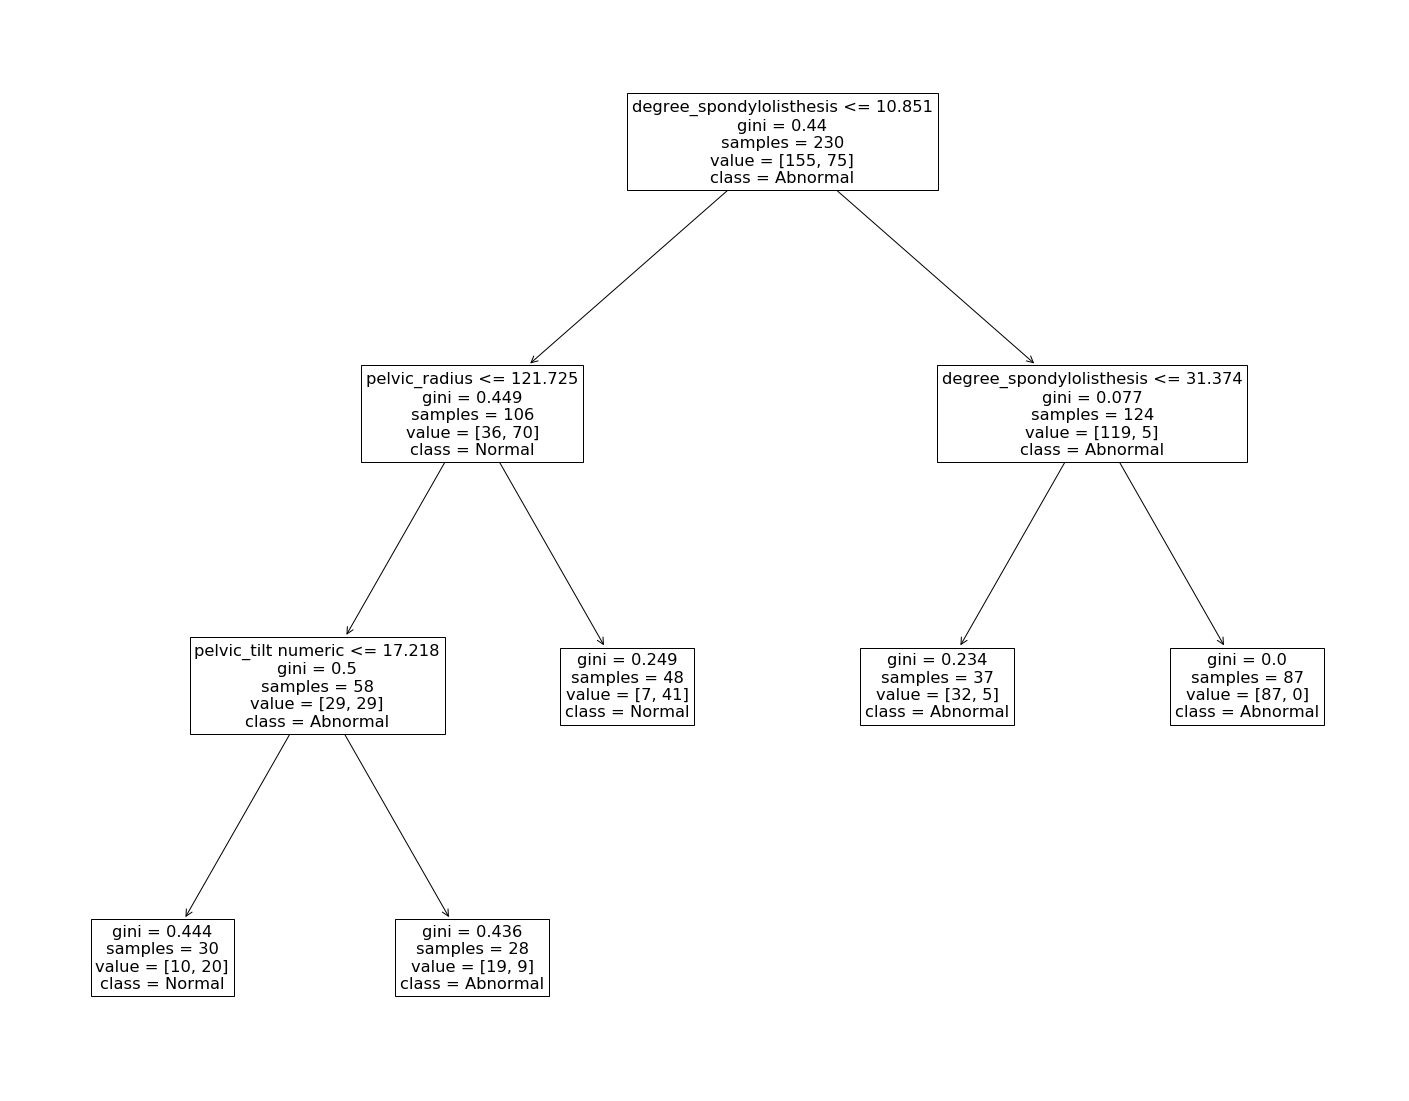

minimum samples leaf=40


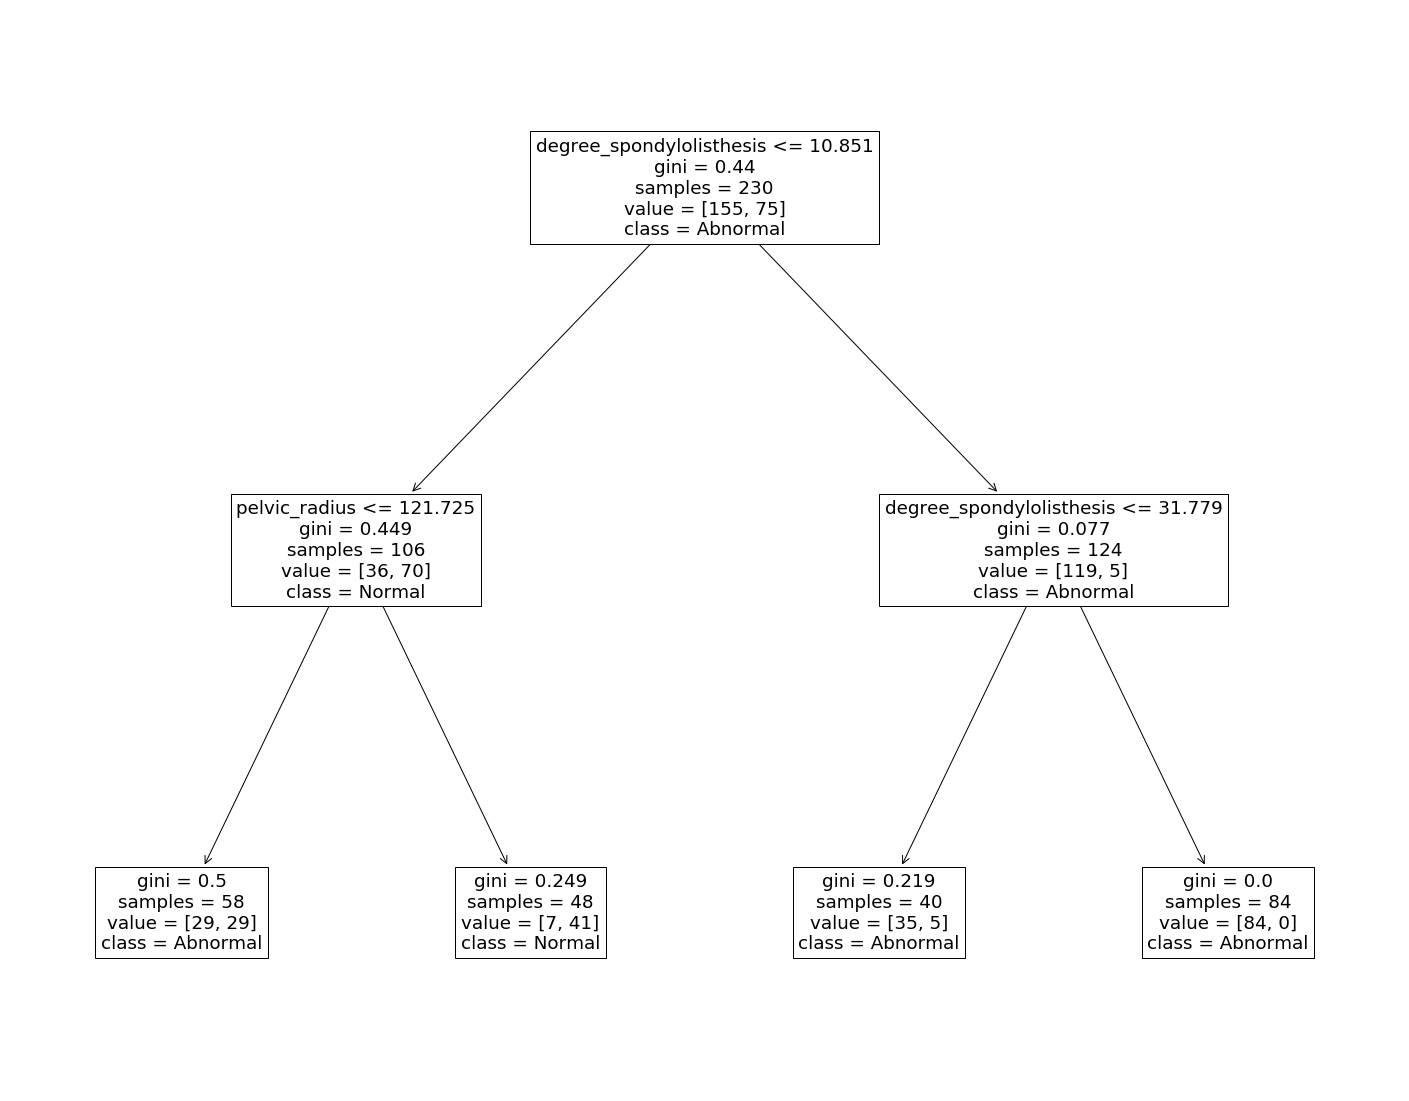

minimum samples leaf=50


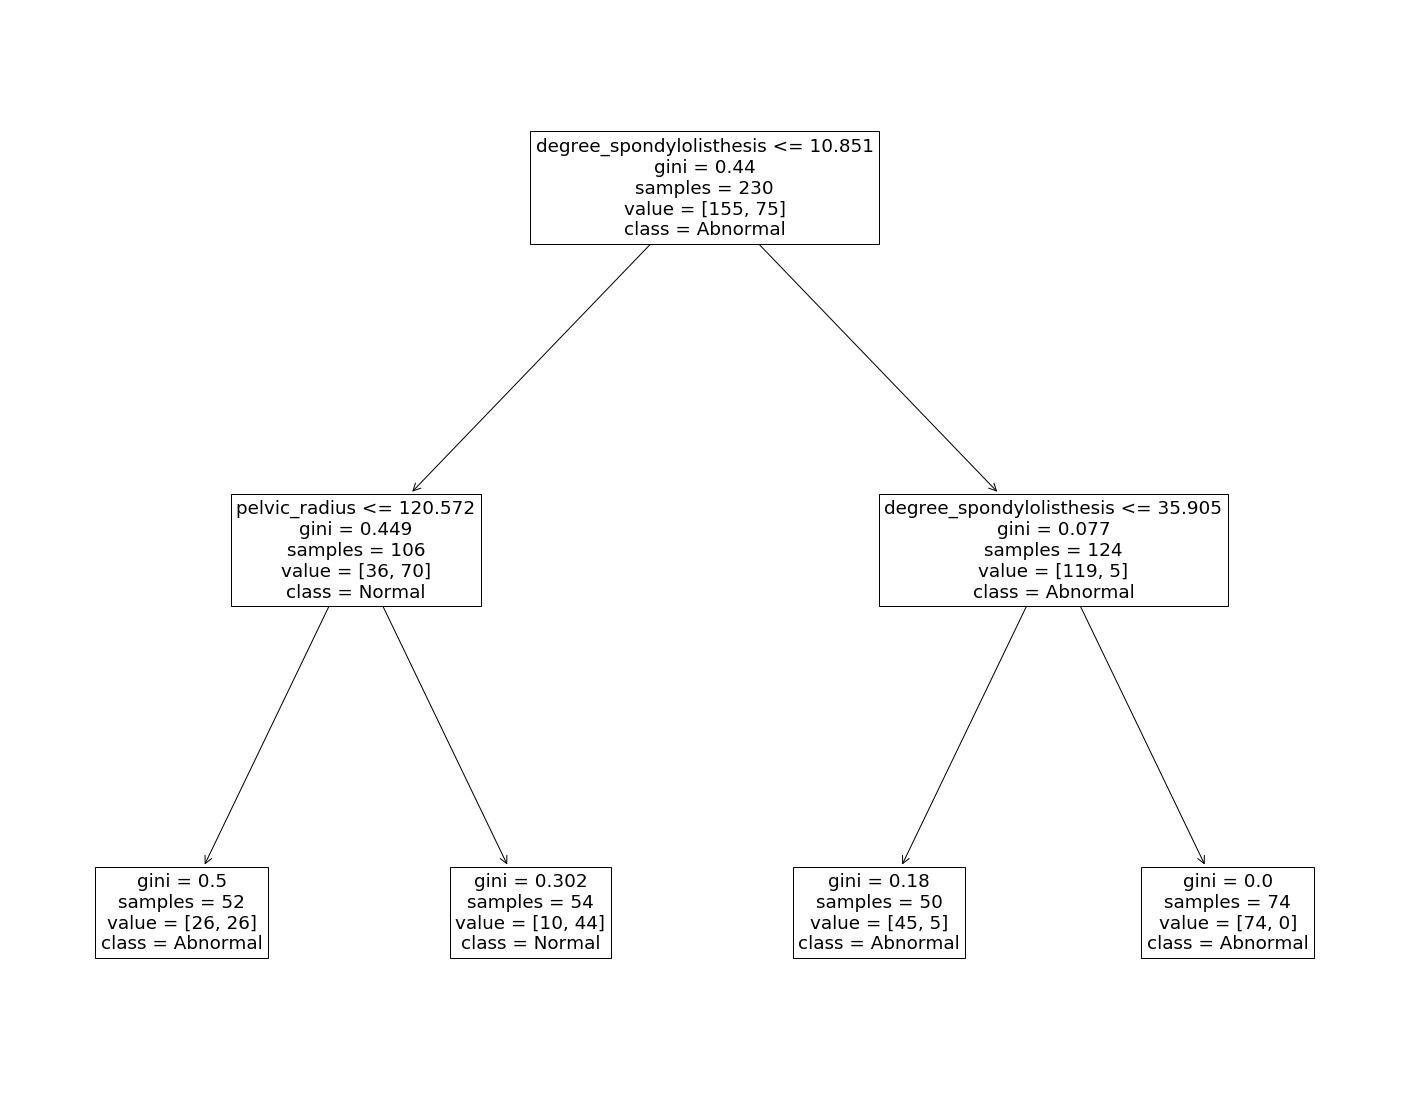

In [43]:
i=0
for clf in clfs:
    print("minimum samples leaf={}".format(l[i]))
    d=clf.fit(train_data,train_label)
    plt.figure(figsize=(25,20))
    tree.plot_tree(clf,feature_names=train_data.columns,class_names=data["class"].unique())
    plt.show()
    i+=1

1.a)
  Observations:
      From the above five trees we can notice that depth of the tree is decreasing as minimum sample leafnodes increasing.As the depth increases chances of over fitting increases.Tree with ideal depth and with ideal samples in leafnodes is best to choose in most cases.

Let us go in detail of each tree:
MINIMUM SAMPLE LEAF NODES:5
Height of the tree is 7 and leafnodes have the samples less than 10 for each node.There are chances these leafnodes can be outliers or noisy data.so this may lead to error.This is overfitting.so the minimum sample leaf nodes should be ideal for good decision tree.
MINIMUM SAMPLE LEAF NODES:15,25
Height of the tree is 4 and 3 ,and samples are in good number for leafnodes.In my opinion I use any of these trees as my classifier.
MINIMUM SAMPLE LEAF NODES:40,50
Height of the tree is two less that may leads to under-fitting.so it is better to avoid these trees.
   
    I will use classifier 2 that is minimum sample leaf nodes is 15 as my classifier to build the model as the height of the tree and samples in leaf node are ideal.This may give or not give the highest accuracy but this is the ideal tree to build the model. 

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy=[]
i=0
for clf in clfs:
    clf_predict=clf.predict(test_data)
    print("sample size {}: accuracy:{} " .format(l[i],accuracy_score(test_label,clf_predict)*100))
    accuracy.append(accuracy_score(test_label,clf_predict))
    print(classification_report(test_label,clf_predict))
    i+=1

sample size 5: accuracy:83.75 
              precision    recall  f1-score   support

    Abnormal       0.86      0.91      0.88        55
      Normal       0.77      0.68      0.72        25

    accuracy                           0.84        80
   macro avg       0.82      0.79      0.80        80
weighted avg       0.83      0.84      0.83        80

sample size 15: accuracy:76.25 
              precision    recall  f1-score   support

    Abnormal       0.89      0.75      0.81        55
      Normal       0.59      0.80      0.68        25

    accuracy                           0.76        80
   macro avg       0.74      0.77      0.74        80
weighted avg       0.80      0.76      0.77        80

sample size 25: accuracy:73.75 
              precision    recall  f1-score   support

    Abnormal       0.89      0.71      0.79        55
      Normal       0.56      0.80      0.66        25

    accuracy                           0.74        80
   macro avg       0.72      0.75

In [7]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
r_normal = []
r_abnormal=[]
p_normal=[]
p_abnormal=[]
for clf in clfs:
        clf_predict=clf.predict(test_data)
        r_normal.append(recall_score(test_label,clf_predict,pos_label = "Normal"))
        r_abnormal.append(recall_score(test_label,clf_predict,pos_label="Abnormal"))
        p_normal.append(precision_score(test_label,clf_predict,pos_label = "Normal"))
        p_abnormal.append(precision_score(test_label,clf_predict,pos_label = "Abnormal"))

Text(0.5, 1.0, 'ACCURACY')

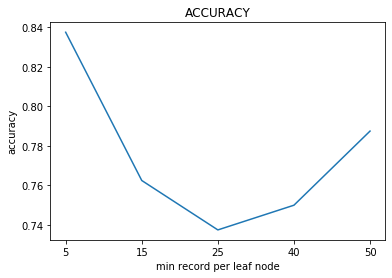

In [8]:
X=["5","15","25","40","50"]
plt.xlabel("min record per leaf node")
plt.ylabel("accuracy")
plt.plot(X,accuracy)
plt.title("ACCURACY")

 Observations:
   For the random test samples the accuracy graph for minimum sample leaf nodes 5 is around 84 and this  is the highest accuracy model reached among the five classifiers.From the graph we can see that there was a decrease in accuracy from classifier 1 to classifier 3 and then it slowly started increasing and exceeds classifier2 accuracy.
   If we run the code repeated times generating different random numbers for each run,accuracy graph changes for each run.I observed that classifier 1 classifier 2 and classifier 3 maintaining good numbers for each run.Accuracy for sample 5 is more as it classifies every data point in data set but it may lead to over fitting in some cases.

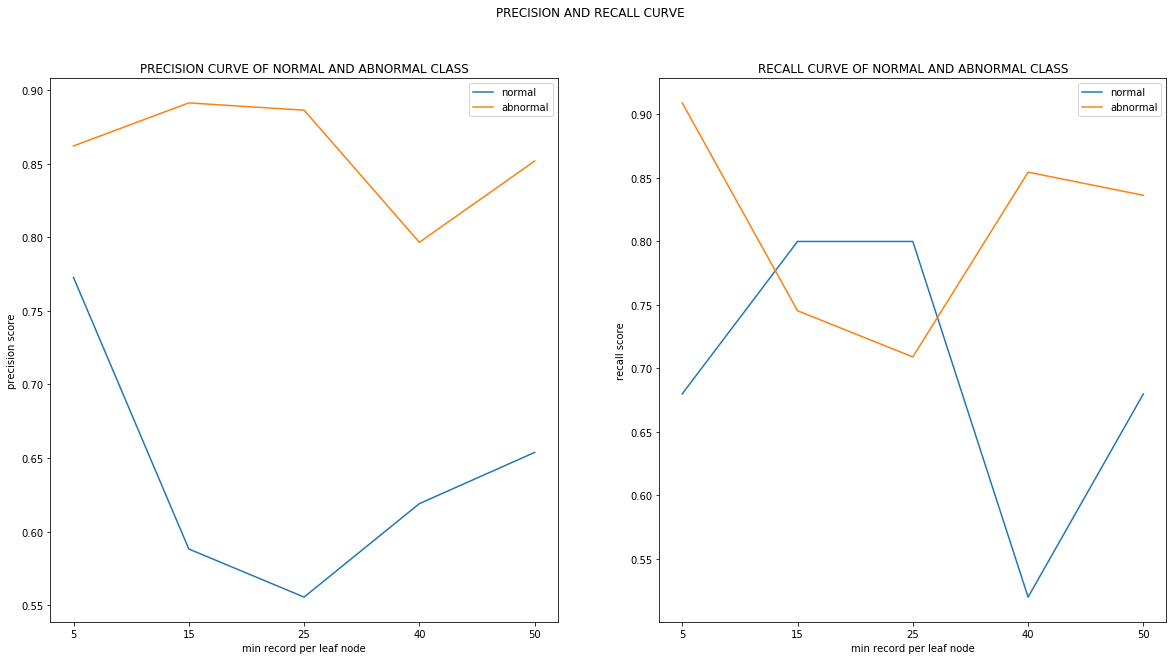

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(X,p_normal,label="normal")
plt.plot(X,p_abnormal,label="abnormal")
plt.xlabel("min record per leaf node")
plt.ylabel("precision score")
plt.legend()
plt.title("PRECISION CURVE OF NORMAL AND ABNORMAL CLASS")
plt.subplot(1,2,2)
plt.plot(X,r_normal,label="normal")
plt.plot(X,r_abnormal,label="abnormal")
plt.xlabel("min record per leaf node")
plt.ylabel("recall score")
plt.legend()
plt.title("RECALL CURVE OF NORMAL AND ABNORMAL CLASS")
plt.suptitle("PRECISION AND RECALL CURVE")
plt.show()

Precision:
 Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives.It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.precision and recall not cares about the negative class,it totally cares about positive class.
 Observations:
 In the above precision curve graph for Normal class it follows similar trend as the Accuracy curve.for classifier 1 it is around 77 percent good it predicts the positive values it strats decreasing till classifier 3 for 56 percent and increases for classifier 4 and then classifier 5.
 For the abnormal class it reaches maximum when the minimum sample leaf nodes is 15.
  
Recall:
 Recall is a ratio of the true positive divded by total number of positives(sum of true positve and false negative).
 Observations:
   True positive rate hit the maximum at minimum sample leafnodes is 15 and remains same for next classifier for normal class and a steep decrease for next classifier(minimum sample leaf nodes = 40) for normal class.
   For abnormal class the highest point starts from classifier 1 and decreases for next to two classifiers as we seen in precision and accuracy graphs.
   The attribute ”degree spodylolisthesis” has the highest variance and hence it’s usage as the root node would make the classiﬁcation more eﬃcient. 

## Problem 2

In [10]:
data1=pd.read_csv("D:/IDA/Biomechanical_Data_3Classes.csv")

In [11]:
train_data1 = data1.iloc[train_ids]
test_data1 = data1.iloc[test_ids] 

#training data
train_label1=train_data1["class"]
train_data1=train_data1.drop(columns=["class"])

# Testing data
test_label1=test_data1["class"]
test_data1=test_data1.drop(columns=["class"])

In [47]:
clf=[]
m=[5,15,25,40,50]
for m in m:
    clf1=tree.DecisionTreeClassifier(min_samples_leaf=m)
    clf1.fit(train_data1,train_label1)
    clf.append(clf1)

minimum samples leaf=5


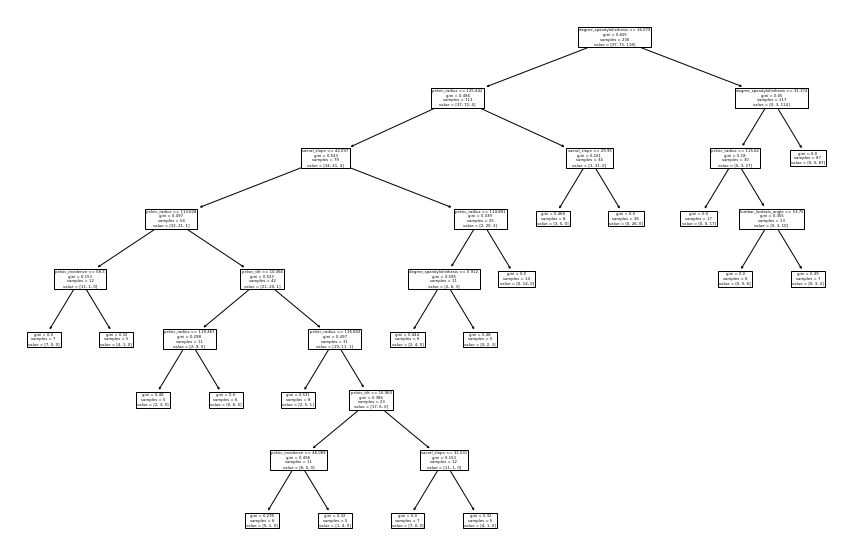

minimum samples leaf=15


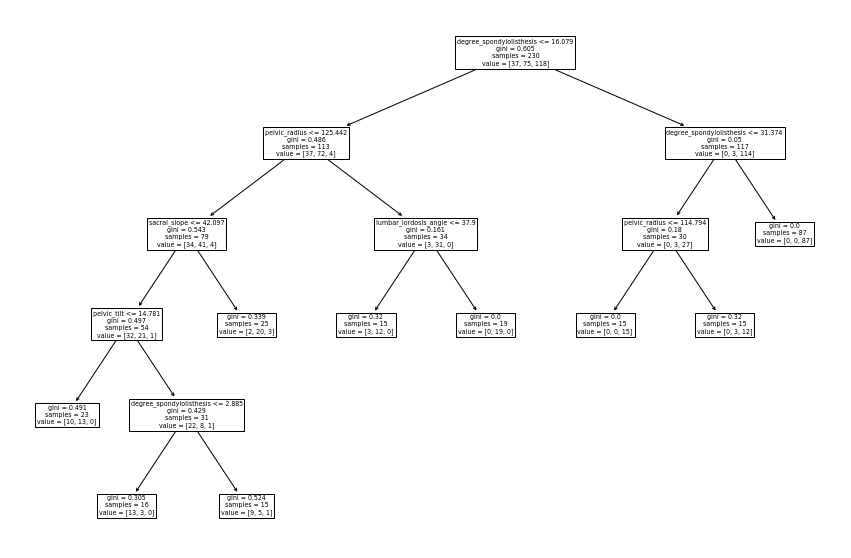

minimum samples leaf=25


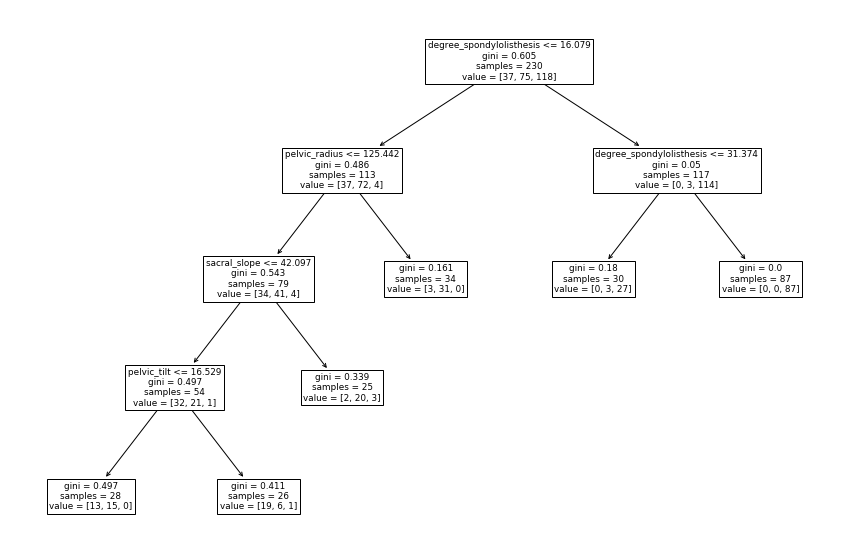

minimum samples leaf=40


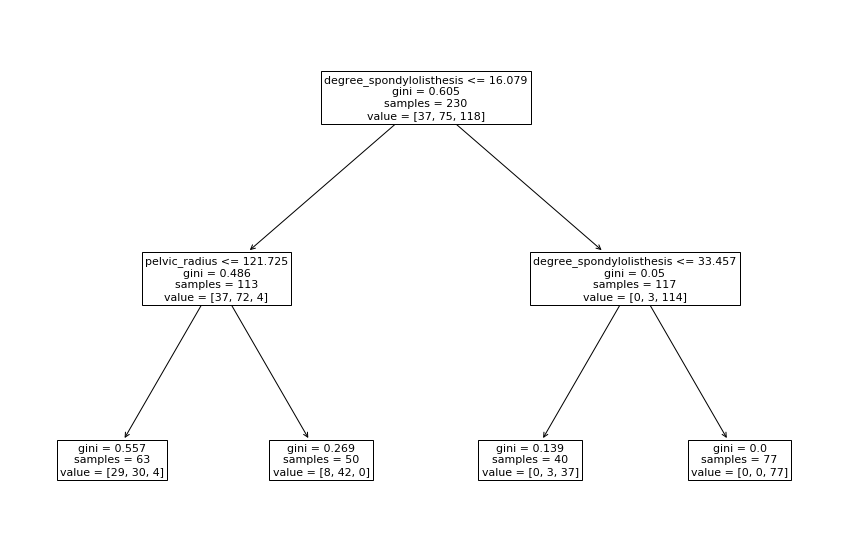

minimum samples leaf=50


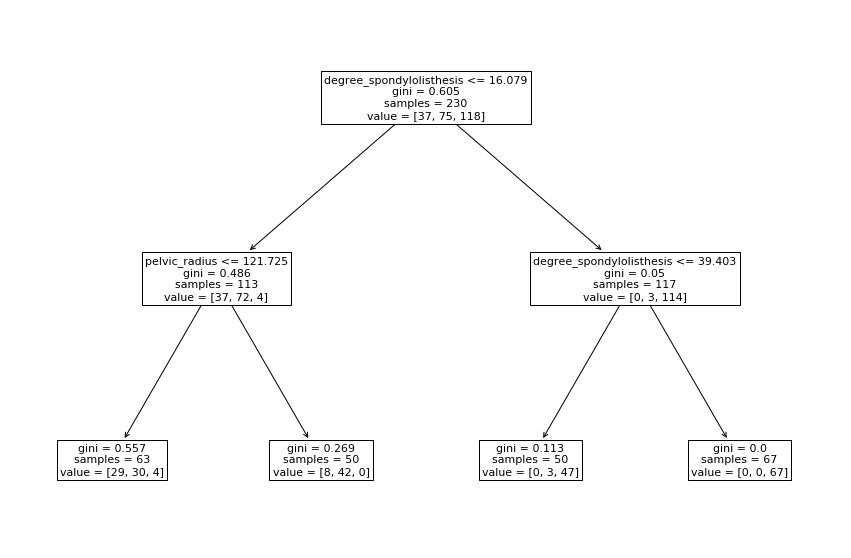

In [51]:
i=0
for c in clf:
    print("minimum samples leaf={}".format(l[i]))
    d=c.fit(train_data1,train_label1)
    plt.figure(figsize=(15,10))
    tree.plot_tree(c,feature_names=train_data1.columns)
    plt.show()
    i+=1

Observations:
Similar to the trees in data2, the decrease in the leaf nodes with the increase in the ’MinLeafSize’ value is a given.
The attribute ’pelvic incidence’ has not been used for the classiﬁcation in the decision tree.
The trees for MinLeafSize of 40 and 50 are same.
The internal nodes are being pruned as the MinLeafSize value increases leaving the split interval of the other nodes unaltered.
  In compare to data2 and data3 height of the tree is higher for data3 classifiers.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy2=[]
i=0
for cl in clf:
    cl_predict=cl.predict(test_data1)
    print("sample size {}: accuracy:{} " .format(l[i],accuracy_score(test_label1,cl_predict)*100))
    accuracy2.append(accuracy_score(test_label1,cl_predict))
    print(classification_report(test_label1,cl_predict))
    i+=1

sample size 5: accuracy:78.75 
                   precision    recall  f1-score   support

           Hernia       0.80      0.52      0.63        23
           Normal       0.65      0.80      0.71        25
Spondylolisthesis       0.91      0.97      0.94        32

         accuracy                           0.79        80
        macro avg       0.79      0.76      0.76        80
     weighted avg       0.80      0.79      0.78        80

sample size 15: accuracy:76.25 
                   precision    recall  f1-score   support

           Hernia       0.67      0.43      0.53        23
           Normal       0.59      0.80      0.68        25
Spondylolisthesis       1.00      0.97      0.98        32

         accuracy                           0.76        80
        macro avg       0.75      0.73      0.73        80
     weighted avg       0.78      0.76      0.76        80

sample size 25: accuracy:73.75 
                   precision    recall  f1-score   support

           He

C:\Users\vishwateja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vishwateja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
from sklearn.metrics import recall_score
x=["5","15","25","40","50"]
a=[]
for cl in clf:
    cl_predict=cl.predict(test_data1)
    a.append(recall_score(test_label1,cl_predict,average=None))

In [16]:
rhernia=[]
rNormal=[]
rSpondylolisthesis=[]
for i in range(5):
    rhernia.append(a[i][0])
    rNormal.append(a[i][1])
    rSpondylolisthesis.append(a[i][2])    

In [17]:
from sklearn.metrics import precision_score
x=["5","15","25","40","50"]
b=[]
for cl in clf:
    cl_predict=cl.predict(test_data1)
    b.append(precision_score(test_label1,cl_predict,average=None))

C:\Users\vishwateja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\vishwateja\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
phernia=[]
pNormal=[]
pSpondylolisthesis=[]
for i in range(5):
    phernia.append(b[i][0])
    pNormal.append(b[i][1])
    pSpondylolisthesis.append(b[i][2]) 

Text(0.5, 1.0, 'ACCURACY')

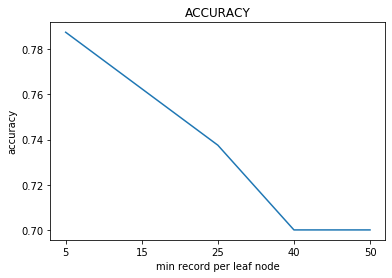

In [19]:
plt.xlabel("min record per leaf node")
plt.ylabel("accuracy")
plt.plot(X,accuracy2)
plt.title("ACCURACY")

accuracy for the data3 monotonically decreases from classifier 1 to classifier 4 and remains same fro classifier 4 and classifier 5
 In compare to data2 and data3 accuracy of classifiers decreased for each classifier.In data 2 no two accuracys are same but in the above it is same for last two classifiers.

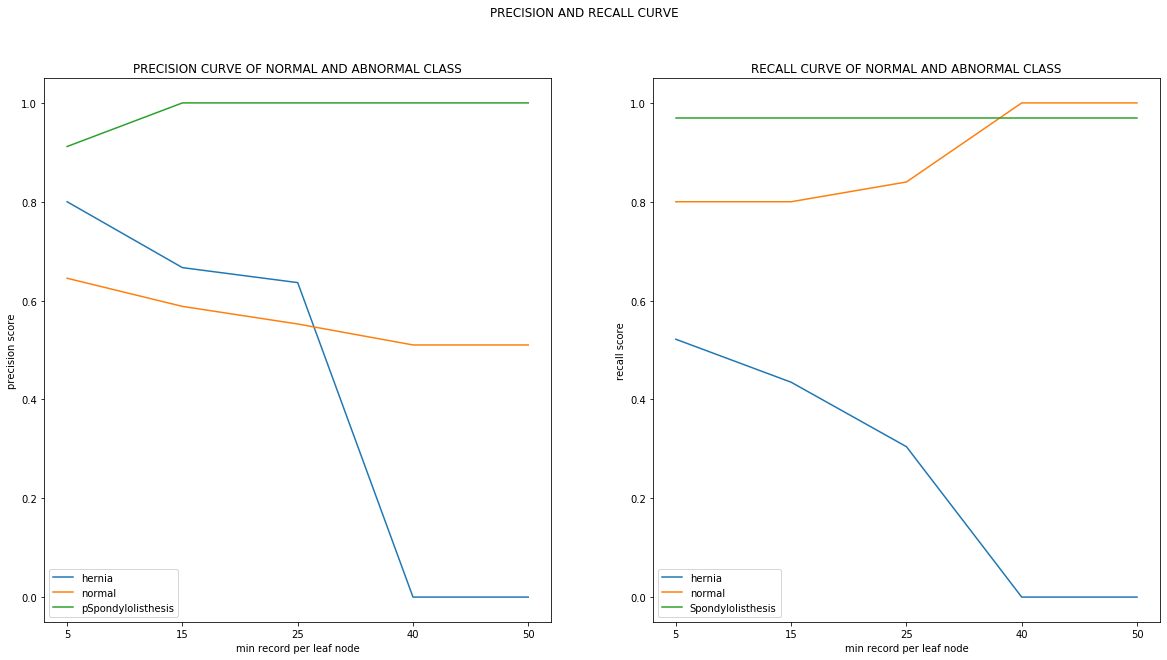

In [20]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(X,phernia,label="hernia")
plt.plot(X,pNormal,label="normal")
plt.plot(X,pSpondylolisthesis,label="pSpondylolisthesis")
plt.xlabel("min record per leaf node")
plt.ylabel("precision score")
plt.legend()
plt.title("PRECISION CURVE OF NORMAL AND ABNORMAL CLASS")
plt.subplot(1,2,2)
plt.plot(X,rhernia,label="hernia")
plt.plot(X,rNormal,label="normal")
plt.plot(X,rSpondylolisthesis,label="Spondylolisthesis")
plt.xlabel("min record per leaf node")
plt.ylabel("recall score")
plt.legend()
plt.title("RECALL CURVE OF NORMAL AND ABNORMAL CLASS")
plt.suptitle("PRECISION AND RECALL CURVE")
plt.show()

Precision:
precision for hernia class and accuracy of last two classifiers have the same value.precision for classifier 1 is 80 percent and decreases to classifier 4.
precision for normal class follows the same pattern as hernia class starts at 0.65 and decreases till classifier 4 and classifier 4and 5 values remains same.
recall value for class 3 is same for all the classifiers except for classifier1
In compare to data2 and data3 classifier 1 has the highest precision value for both the data.
Recall:
same as the precision curve the highest recall fro hernia is for classifier 1 at around 0.56 and it starts decreasing till classifier 4 and remains sam efor classifier 4 and classifier 5.
for normal class the highest recall is for classifier 4 and classifier 5 that have same value and least recall rate is for classifier 1
recall curve for class 3 is same for all classifiers.

# problem-3

In [24]:
from scipy.stats import spearmanr
data2=pd.read_csv("D:/IDA/Biomechanical_Data_2Classes.csv")

In [25]:
data2["class"]=data["class"].astype("category")
data2["class"]=data["class"].map({"Abnormal":1,"Normal":0})

In [26]:
sp=[]
for idx,feature in enumerate(list(data.columns)):
    coef,_=spearmanr(data[feature],data["class"])
    sp.append(coef)
sp

[-0.36088380614796306,
 -0.3223278439526679,
 -0.31469579164838013,
 -0.21949991063518884,
 0.35857044841624536,
 -0.5933762581855931,
 0.9999999999999998]

In [27]:
del sp[6]

In [28]:
findata=data2.drop(columns=[data2.columns[sp.index(min(sp))],data.columns[sp.index(max(sp))]])

In [53]:
n_train = 230

# shuffle the indexes
shuffled_indexes = np.arange(len(findata))
np.random.shuffle(shuffled_indexes)

# use 'n_train' samples for training and the rest for testing
train_ids = shuffled_indexes[:n_train]
test_ids = shuffled_indexes[n_train:]

#data["class"]=data["class"].astype("category")

train_data2 = findata.iloc[train_ids]
test_data2 = findata.iloc[test_ids] 

#training data
train_label2=train_data2["class"]
train_data2=train_data2.drop(columns=["class"])

# # Testing data
test_label2=test_data2["class"]
test_data2=test_data2.drop(columns=["class"])
train_data2.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope'],
      dtype='object')

In [30]:
clfs2 = []
l = [5,15,25,40,50]
for m in l:
    k = tree.DecisionTreeClassifier(min_samples_leaf=m)
    k.fit(train_data2,train_label2)
    clfs2.append(k)

minimum samples leaf=5


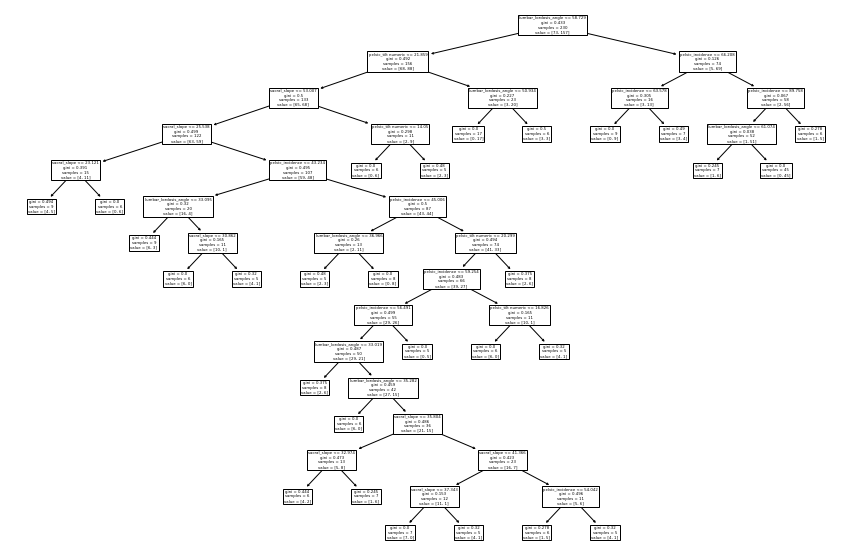

minimum samples leaf=15


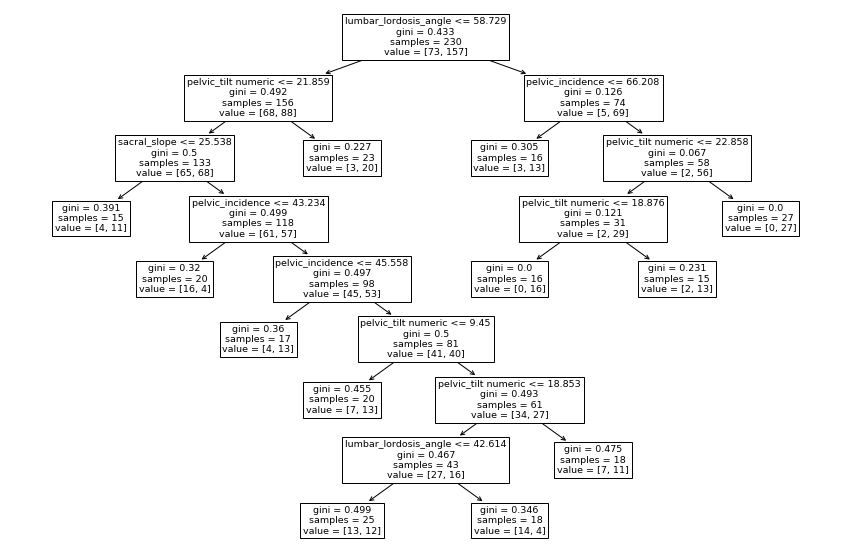

minimum samples leaf=25


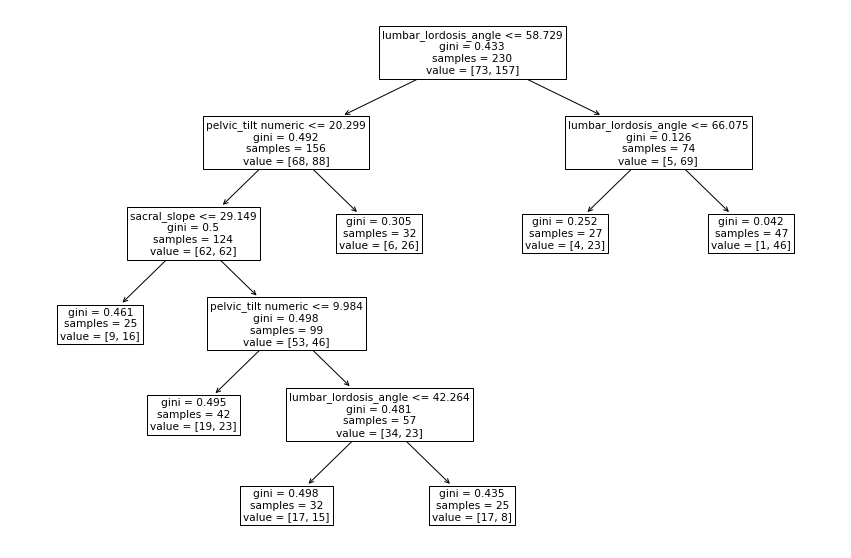

minimum samples leaf=40


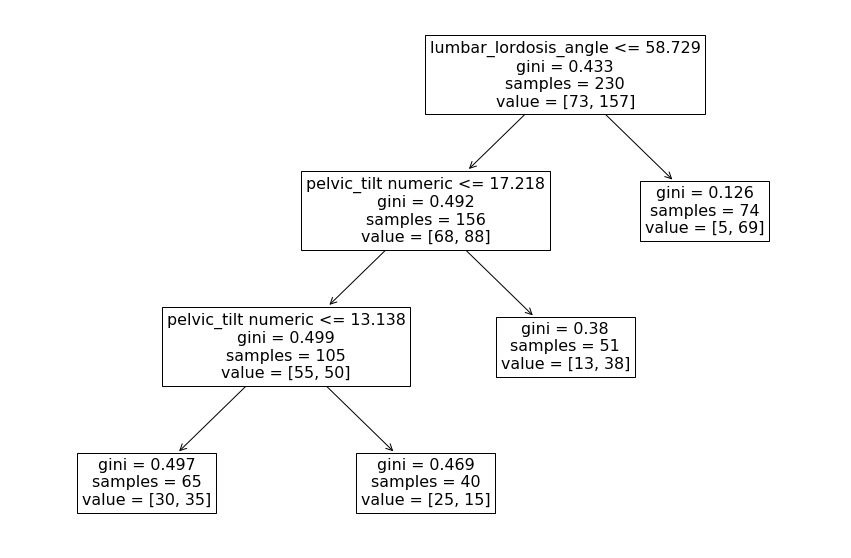

minimum samples leaf=50


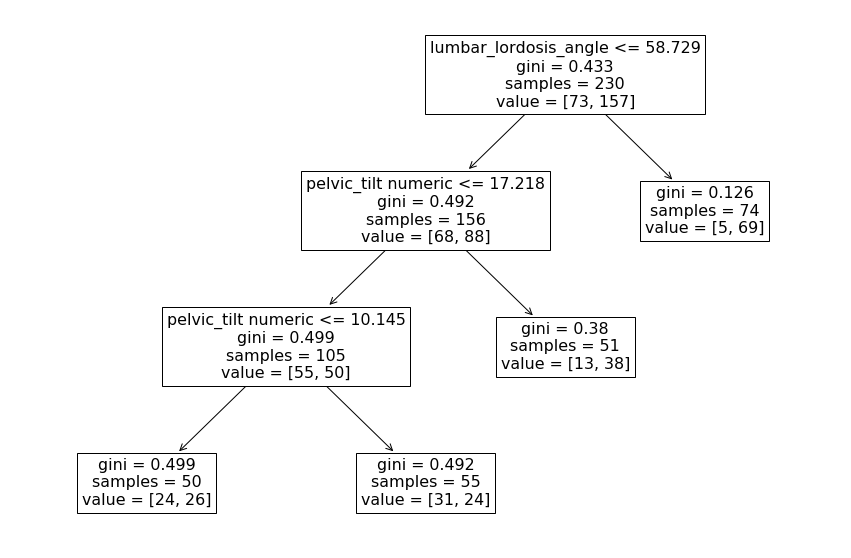

In [52]:
i=0
for c in clfs2:
    print("minimum samples leaf={}".format(l[i]))
    d=c.fit(train_data2,train_label2)
    plt.figure(figsize=(15,10))
    tree.plot_tree(c,feature_names=train_data2.columns)
    plt.show()
    i+=1

Observations:
For 1.a and 2.a we can observe that there is a great increase in depth of the heights for 1a and 2a.
root node changes for 1a and 2a.
depth increasing as the most corelated features to the target label are dropped

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy3=[]
i=0
for clf in clfs2:
    cf_predict=clf.predict(test_data2)
    print("sample size {}: accuracy:{} " .format(l[i],accuracy_score(test_label2,cf_predict)*100))
    accuracy3.append(accuracy_score(test_label2,cf_predict))
    print(classification_report(test_label2,cf_predict))
    i+=1

sample size 5: accuracy:67.5 
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        27
           1       0.73      0.81      0.77        53

    accuracy                           0.68        80
   macro avg       0.63      0.61      0.61        80
weighted avg       0.66      0.68      0.66        80

sample size 15: accuracy:67.5 
              precision    recall  f1-score   support

           0       0.52      0.52      0.52        27
           1       0.75      0.75      0.75        53

    accuracy                           0.68        80
   macro avg       0.64      0.64      0.64        80
weighted avg       0.68      0.68      0.68        80

sample size 25: accuracy:61.25000000000001 
              precision    recall  f1-score   support

           0       0.39      0.26      0.31        27
           1       0.68      0.79      0.73        53

    accuracy                           0.61        80
   macro avg       0.53

In [33]:
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
r3_normal = []
r3_abnormal=[]
p3_normal=[]
p3_abnormal=[]
for clf in clfs2:
        cf_predict=clf.predict(test_data2)
        r3_normal.append(recall_score(test_label2,cf_predict,pos_label = 0))
        r3_abnormal.append(recall_score(test_label2,cf_predict,pos_label=1))
        p3_normal.append(precision_score(test_label2,cf_predict,pos_label = 0))
        p3_abnormal.append(precision_score(test_label2,cf_predict,pos_label = 1))

Text(0.5, 1.0, 'ACCURACY')

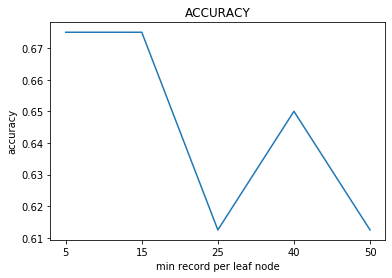

In [34]:
X=["5","15","25","40","50"]
plt.xlabel("min record per leaf node")
plt.ylabel("accuracy")
plt.plot(X,accuracy3)
plt.title("ACCURACY")

For 1a and 2a accuracy decreased for 2a.The difference of accuracy for 1a and 2a is high.
As we dropped corelated columns with greater magnitude the accuracy of the model decreased for the new data.

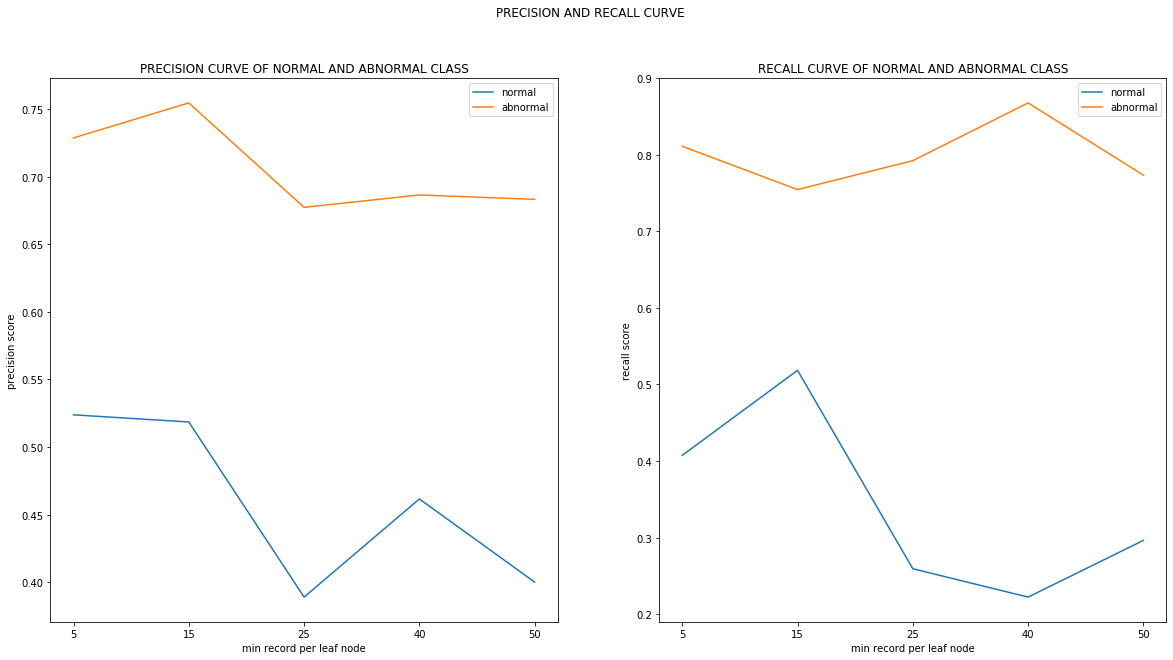

In [35]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(X,p3_normal,label="normal")
plt.plot(X,p3_abnormal,label="abnormal")
plt.xlabel("min record per leaf node")
plt.ylabel("precision score")
plt.legend()
plt.title("PRECISION CURVE OF NORMAL AND ABNORMAL CLASS")
plt.subplot(1,2,2)
plt.plot(X,r3_normal,label="normal")
plt.plot(X,r3_abnormal,label="abnormal")
plt.xlabel("min record per leaf node")
plt.ylabel("recall score")
plt.legend()
plt.title("RECALL CURVE OF NORMAL AND ABNORMAL CLASS")
plt.suptitle("PRECISION AND RECALL CURVE")
plt.show()

Precision:
As accuracy ,the precision for two classes were decreased as compared to 1a.
It reaches minimum when minmum leaf nodes is 25 and maximum at minimum leaf nodes is 5 for normal class.
for abnormal the it reaches minimum point same as the normal class but the maximum is at minimum sample leaf nodes is 15.
Recall:
Recall is highest for classifier2 and minimum for classifier 5 for normal class and for abnormal class it is high for classifier 4 and minimum for classifier 2.
